In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
df_test = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
df.describe(include='object')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


In [7]:
df['engine'].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

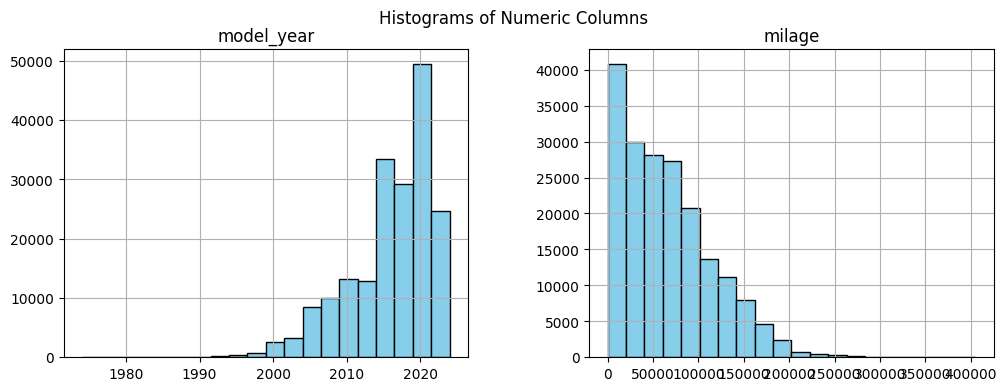

In [8]:
import matplotlib.pyplot as plt

df[['model_year', 'milage']].hist(figsize=(12, 4), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


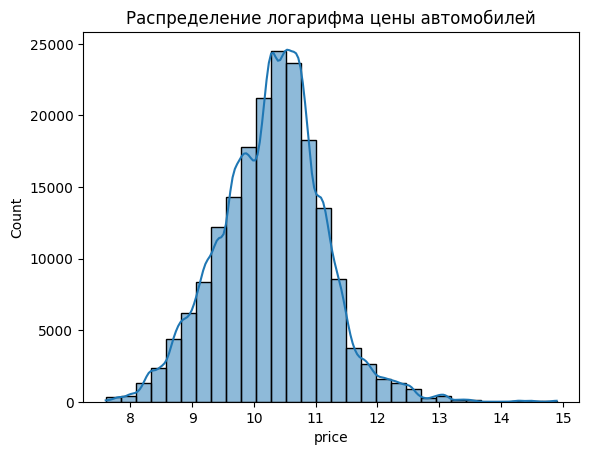

In [9]:
import seaborn as sns

log_price = np.log1p(df['price'])

sns.histplot(log_price, kde=True, bins=30)
plt.title('Распределение логарифма цены автомобилей')
plt.show()

In [10]:
import re

# Function to extract horsepower, engine size, and cylinder count
def extract_engine_info(engine_str):
    hp_match = re.search(r'(\d+\.?\d*)HP', engine_str)  # Extract HP
    engine_size_match = re.search(r'(\d+\.?\d*)L', engine_str)  # Extract engine size
    cylinders_match = re.search(r'(\d+)\sCylinder', engine_str)  # Extract cylinder count
    
    hp = float(hp_match.group(1)) if hp_match else None
    engine_size = float(engine_size_match.group(1)) if engine_size_match else None
    cylinders = int(cylinders_match.group(1)) if cylinders_match else None
    
    return hp, engine_size, cylinders

# Apply the function and create new columns
df[['hp', 'engine_size', 'cylinders']] = df['engine'].apply(lambda x: pd.Series(extract_engine_info(x)))
df_test[['hp', 'engine_size', 'cylinders']] = df['engine'].apply(lambda x: pd.Series(extract_engine_info(x)))

In [11]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0


In [12]:
# Splitting model into main model and trim version
df[['model_main', 'model_trim']] = df['model'].str.split(' ', n=1, expand=True)
df_test[['model_main', 'model_trim']] = df['model'].str.split(' ', n=1, expand=True)

In [13]:
# Replace invalid or missing values with 'Unknown'
df['fuel_type'] = df['fuel_type'].replace(['–', 'not supported', np.nan], 'Unknown')
df_test['fuel_type'] = df['fuel_type'].replace(['–', 'not supported', np.nan], 'Unknown')

In [14]:
import numpy as np

# Set the threshold for the minimum frequency
threshold = 1000 

# Calculate the value counts for the 'brand' column
brand_counts = df['brand'].value_counts()
test_brand_counts = df_test['brand'].value_counts()

rare_brands = brand_counts[brand_counts < threshold].index
test_rare_brands = test_brand_counts[test_brand_counts < threshold].index

df['brand'] = np.where(df['brand'].isin(rare_brands), 'Other', df['brand'])
df_test['brand'] = np.where(df_test['brand'].isin(test_rare_brands), 'Other', df_test['brand'])

print(df['brand'].value_counts())
print(df_test['brand'].value_counts())

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Other             9953
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Name: count, dtype: int64
brand
Ford             15265
Mercedes-Benz    12875
BMW              11286
Chevrolet        10698
Other             9153
Audi              7289
Porsche           7153
Land              6348
Toyota            6084
Lexus             5729
Jeep              4412
Cadillac          3059
RAM               2

In [15]:
# Replace similar transmission types with standardized values
df['transmission'] = df['transmission'].replace({
    'A/T': 'Automatic', 
    'Automatic CVT': 'Automatic', 
    'CVT Transmission': 'CVT', 
    'M/T': 'Manual',
    '6 Speed At/Mt': 'Automatic',
    'SCHEDULED FOR OR IN PRODUCTION': np.nan  # Remove irrelevant rows
})

# Handle other odd cases, and fill missing or invalid values with 'Unknown'
df['transmission'] = df['transmission'].replace(['–', '2', np.nan], 'Unknown')


# Replace similar transmission types with standardized values
df_test['transmission'] = df_test['transmission'].replace({
    'A/T': 'Automatic', 
    'Automatic CVT': 'Automatic', 
    'CVT Transmission': 'CVT', 
    'M/T': 'Manual',
    '6 Speed At/Mt': 'Automatic',
    'SCHEDULED FOR OR IN PRODUCTION': np.nan  # Remove irrelevant rows
})

# Handle other odd cases, and fill missing or invalid values with 'Unknown'
df_test['transmission'] = df_test['transmission'].replace(['–', '2', np.nan], 'Unknown')

In [16]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,engine_size,cylinders,model_main,model_trim
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,Cooper,S Base
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,LS,V8
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,Silverado,2500 LT
3,3,Other,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,G90,5.0 Ultimate
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,Metris,Base


In [17]:
df_final = df.drop(['id', 'clean_title', 'model', 'engine', 'ext_col', 'int_col', 'model_trim'], axis=1)
df_test = df_test.drop(['id', 'clean_title', 'model', 'engine', 'ext_col', 'int_col', 'model_trim'], axis=1)

In [18]:
# Separate target and features
X = df.drop(columns='price')  # Assuming 'price' is the target column
y = df['price']
X_test = df_test

In [21]:
# ML Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



# log_transformer = FunctionTransformer(np.log1p, validate=True)

# Define numerical features and categorical features
numerical_features = ['model_year', 'milage', 'hp', 'engine_size', 'cylinders']
categorical_features = ['fuel_type', 'transmission', 'model_main', 'accident', "brand"]

# Update the numerical pipeline with Iterative Imputer and transformations
numerical_pipeline = Pipeline([
    ('imputer', IterativeImputer()),  # Use Iterative Imputer instead of Simple Imputer
    # ('log', log_transformer),  # Log transform numerical features
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [23]:
from sklearn.ensemble import RandomForestRegressor


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['model_year', 'milage', 'hp',
                                                   'engine_size',
                                                   'cylinders']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fuel_type', 'transmission',
                                                   'model_main', 'accident',
                                                   'brand'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

# # Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")